# Trabajo Practico Nº 3
## SVM

#### Importación de librerias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Se conjunto de datos creados TP3-1 en R2 
### Lineamente separables 
\begin{align*}
\large y = 2x - 4 \text{(Funcion de la recta)} \\
\end{align*}





### Conjuntos de datos TP3-1

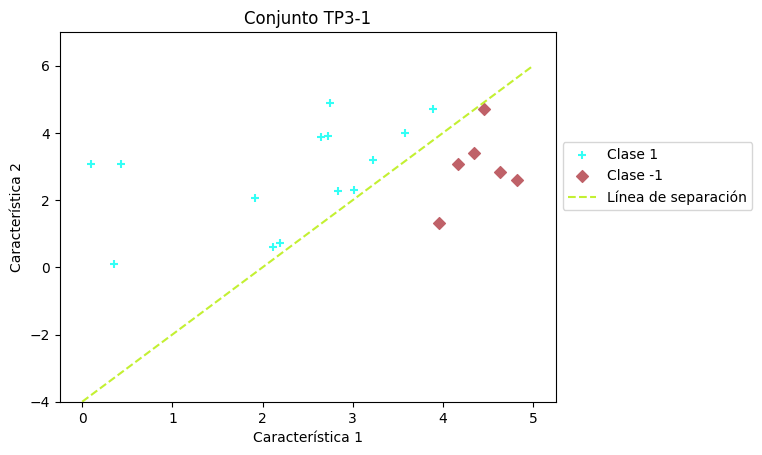

In [87]:

# Establecer una semilla aleatoria para la reproducibilidad
np.random.seed(0)

# Generar puntos aleatorios en el rango [0, 5] × [0, 5]
num_points = 20
x1 = np.random.uniform(0, 5, num_points)
x2 = np.random.uniform(0, 5, num_points)

# Definir la línea de separación
# Por ejemplo, y = 2x - 4u
def recta(x):
    return 2 * x - 4 

# Asignar etiquetas de clase 1 o -1 según la posición con respecto a la línea
y_real = np.where(x2 >= recta(x1), 1, -1)

# Visualizar los datos
plt.scatter(x1[y_real == 1], x2[y_real == 1], label='Clase 1',marker='+',color='#33FFF6')
plt.scatter(x1[y_real == -1], x2[y_real == -1], label='Clase -1',marker='D',color='#BF6168')
plt.plot([0, 5], [recta(0), recta(5)], color='#c3f032', linestyle='--', label='Línea de separación')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend(loc='lower left',bbox_to_anchor=(1, 0.5))
plt.title('Conjunto TP3-1')
plt.ylim(bottom=-4, top=7)
plt.show()


In [88]:
# Unir la cordenas de x1 y x2 en una solo conjunto de datos
X_1 = np.column_stack((x1,x2))

y_1 = y_real

## Se crea un perceptron simple escalon


In [89]:
''' 
weights = pesos
x = input
bias = sesgo
'''
activation = lambda weights, x, bias: np.where(np.dot(x, weights) + bias >=0, 1, -1)

# Inicialización del pesos y del bias (umbral)
weights = np.random.uniform(-1,1, size=2)
bias = np.random.uniform(-1,1)
learning_rate = 0.05
epochs = 10000

# Entrenamiento del perceptron
for epoch in range(epochs):
    error_total = 0                                         # Inicia el error en 0
    for i in range(len(X_1)):
        prediction = activation(weights,X_1[i], bias)       #Inicia la predicion con el peso y el bias aleatoriamente 
        error = y_1[i] - prediction                         # Calcula el error de la clase con la prediccion
        error_total += error**2                             # Sumas los errores 
        weights[0] += learning_rate * X_1[i][0] * error     # Actualiza los pesos
        weights[1] += learning_rate * X_1[i][1] * error
        bias += learning_rate * error                     # Actualiza el bias
    

prediction = (weights,X_1,bias)
y_perceptron= (-weights[0]/weights[1]) * X_1 - bias/weights[1]

# Calcular la precisión del perceptrón 


### Grafica comparativa entre la separación real y la separación del perceptrón

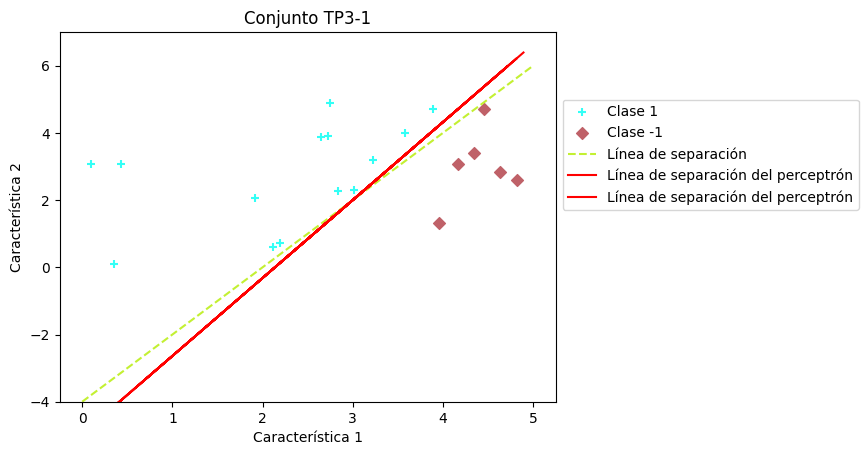

In [90]:
# Visualizar los datos
# Visualizar los datos
plt.scatter(x1[y_real == 1], x2[y_real == 1], label='Clase 1',marker='+',color='#33FFF6')
plt.scatter(x1[y_real == -1], x2[y_real == -1], label='Clase -1',marker='D',color='#BF6168')
plt.plot([0, 5], [recta(0), recta(5)], color='#c3f032', linestyle='--', label='Línea de separación')
plt.plot(X_1, y_perceptron, color='red', label='Línea de separación del perceptrón')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend(loc='lower left',bbox_to_anchor=(1, 0.5))
plt.title('Conjunto TP3-1')
plt.ylim(bottom=-4, top=7)
plt.show()

Podemos observar que el perceptrón clasifica casi igual que la recta que nosotros habiamos dibujado

### Hiperplano Optimo

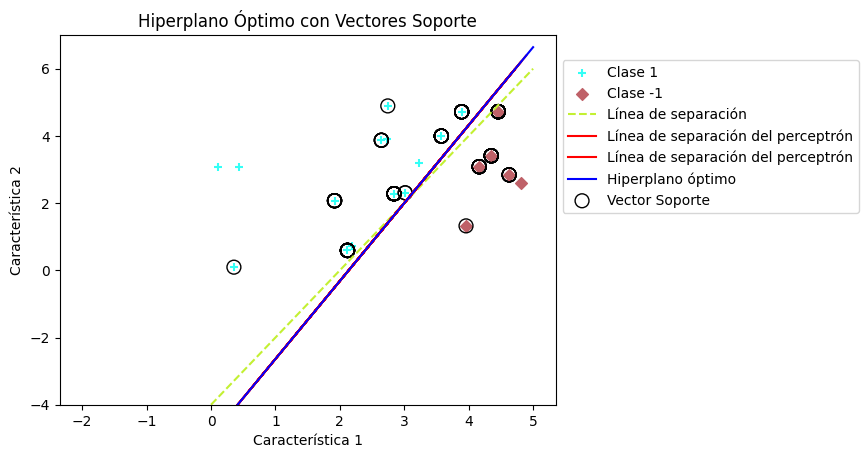

In [100]:
import numpy as np
import matplotlib.pyplot as plt

def perceptron_learning_with_support_vectors(X, y, learning_rate, epochs):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    support_vectors = []  # Almacenar los vectores soporte
    support_vector_labels = []  # Almacenar las etiquetas de los vectores soporte

    for epoch in range(epochs):
        misclassified = False
        for i in range(n_samples):
            z = np.dot(X[i], w) + b
            y_pred = 1 if z > 0 else -1

            if y_pred != y[i]:
                w += learning_rate * y[i] * X[i]
                b += learning_rate * y[i]
                misclassified = True

                # Almacenar vectores soporte
                support_vectors.append(X[i])
                support_vector_labels.append(y[i])

        if not misclassified:
            break

    return w, b, support_vectors, support_vector_labels

# Parámetros de entrenamiento
learning_rate = 0.1
epochs = 1000

# Entrenar el perceptrón y obtener los vectores soporte
w, b, support_vectors, support_vector_labels = perceptron_learning_with_support_vectors(X_1, y_1, learning_rate, epochs)

# Encontrar el hiperplano óptimo
w_optimal = weights
b_optimal = bias

# Graficar los datos
plt.scatter(x1[y_real == 1], x2[y_real == 1], label='Clase 1',marker='+',color='#33FFF6')
plt.scatter(x1[y_real == -1], x2[y_real == -1], label='Clase -1',marker='D',color='#BF6168')
plt.plot([0, 5], [recta(0), recta(5)], color='#c3f032', linestyle='--', label='Línea de separación')
plt.plot(X_1, y_perceptron, color='red', label='Línea de separación del perceptrón')
# Graficar el hiperplano óptimo
x_hyperplane = np.linspace(-2, 5, 100)
y_hyperplane = (-w_optimal[0] / w_optimal[1]) * x_hyperplane - b_optimal / w_optimal[1]
plt.plot(x_hyperplane, y_hyperplane, color='blue', label='Hiperplano óptimo')

# Graficar los vectores soporte
for i, sv in enumerate(support_vectors):
    plt.scatter(sv[0], sv[1], s=100, facecolors='none', edgecolors='k', label='Vector Soporte' if i == 0 else '')

plt.legend()
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Hiperplano Óptimo con Vectores Soporte')
plt.legend(loc='lower left',bbox_to_anchor=(1, 0.5))
plt.ylim(bottom=-4, top=7)
plt.show()


# SVM TP3-2

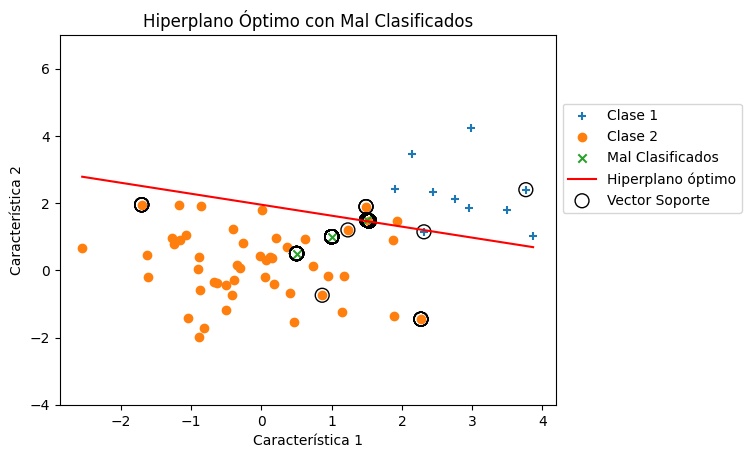

In [111]:
import numpy as np

# Generar datos de ejemplo
np.random.seed(0)

# Clase 1 (positiva)
X1 = np.random.randn(10, 2) + [2, 2]
y1 = np.ones(10)

# Clase 2 (negativa)
X2 = np.random.randn(50, 2) + [0, 0]
y2 = -np.ones(50)

# Agregar algunos ejemplos mal clasificados cerca del hiperplano
X_mal_clasificados = np.array([[1, 1], [1.5, 1.5], [0.5, 0.5]])
y_mal_clasificados = np.array([1, 1, -1])

# Combinar las dos clases y los ejemplos mal clasificados
X = np.vstack((X1, X2, X_mal_clasificados))
y = np.hstack((y1, y2, y_mal_clasificados))

# Entrenar el perceptrón
w, b, support_vectors, support_vector_labels = perceptron_learning_with_support_vectors(X, y, learning_rate, epochs)
import matplotlib.pyplot as plt

# Graficar los datos
plt.scatter(X1[:, 0], X1[:, 1], label='Clase 1', marker='+')
plt.scatter(X2[:, 0], X2[:, 1], label='Clase 2', marker='o')
plt.scatter(X_mal_clasificados[:, 0], X_mal_clasificados[:, 1], label='Mal Clasificados', marker='x')

# Graficar el hiperplano óptimo
x_hyperplane = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_hyperplane = (-w[0] / w[1]) * x_hyperplane - b / w[1]
plt.plot(x_hyperplane, y_hyperplane, color='red', label='Hiperplano óptimo')

# Graficar los vectores soporte
for i, sv in enumerate(support_vectors):
    plt.scatter(sv[0], sv[1], s=100, facecolors='none', edgecolors='k', label='Vector Soporte' if i == 0 else '')

plt.legend()
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Hiperplano Óptimo con Mal Clasificados')
plt.legend(loc='lower left',bbox_to_anchor=(1, 0.5))
plt.ylim(bottom=-4, top=7)
plt.show()


## Ejercico N 2
### Segmentación de imagen

#### ___Carga de las imagenes___

In [ ]:
import cv2
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# Lista para cargar cada imagen

rutas_imagenes = [
    '../imagenes/vaca.jpg',
    '../imagenes/cielo.jpg',
    '../imagenes/pasto.jpg'
]

# Lista con las imagenes y se cargan las imagenes
imagenes = [cv2.imread(ruta) for ruta in rutas_imagenes if cv2.imread(ruta) is not None]

# Se crea una lista con los nombres de cada imagen
nombre_imagenes = ['vaca', 'cielo', 'pasto']

# Se crea un diccionario para almacenar las imagenes con nombres
dic_imagenes = {nombre: imagen for nombre, imagen in zip (nombre_imagenes, imagenes)}


# Se imprime el tamaño de cada imagen
# Altura - Ancho - Canales 
for nombre, imagen in dic_imagenes.items():
    print(f'Nombre: {nombre}, Tamaño: {imagen.shape}')

#### Redimenzionar las Imagenes

In [ ]:
# Obtener el alto y ancho maximo 

altura_max = max(imagen.shape[0] for imagen in dic_imagenes.values())
ancho_max = max(imagen.shape[1] for imagen in dic_imagenes.values())

# Redoimenzionar las imagenes para que sean todas iguales
dic_imagenes = {nombre: cv2.resize(imagen,(ancho_max, altura_max)) for nombre, imagen in dic_imagenes.items()}

for nombre, imagen in dic_imagenes.items():
    print(f'Nombre: {nombre}, Tamaño: {imagen.shape}')

### Construcción de los conjunto de datos

In [ ]:
import pandas as pd
# Define tus etiquetas de clase
etiquetas = {
    'vaca': 0,
    'cielo': 1,
    'pasto': 2
}

# Listas para almacenar datos
datos = []
etiqueta_column = []

# Itera sobre el diccionario de imágenes
for nombre, imagen in dic_imagenes.items():
    # Extrae los valores RGB de la imagen y aplana la lista de píxeles
    valores_rgb = imagen.reshape(-1, 3)
    
    # Repite la etiqueta para cada píxel en la imagen
    etiqueta = [etiquetas[nombre]] * valores_rgb.shape[0]
    
    # Agrega los datos y etiquetas a las listas
    datos.extend(valores_rgb)
    etiqueta_column.extend(etiqueta)

# Crea un DataFrame de pandas
df = pd.DataFrame(datos, columns=['R', 'G', 'B'])
df['Etiqueta'] = etiqueta_column



### Describe el contenido del dataset

In [ ]:
df.describe()

### Separar los conjuntos de entranamiento y prueba

In [ ]:
from sklearn.utils import shuffle

'''
    El dataset se encuentra ordenado por etiqueta,
    esto puede introducir un sesgo en los datos si se dividen 
    directamente en conjunto de entrenamiento, prueba.
    Por lo tanto se desordena el dataset par garantizar que los datos de
    entrenamiento y prueba sean mas representativos
'''
# Se desordena el dataset
df = shuffle(df, random_state=50)


#### Division del conjunto de datos en entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['R','G','B']] # Caracteristicas
y = df['Etiqueta']

# Se divide los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


### Crear el modelo SVM

In [ ]:
from sklearn.svm import SVC
from tqdm import tqdm  

# Encuentra el mejor valor C
C = 10
# Entrenamos el modelo con el conjunto de entrenamiento
svm = SVC(kernel='linear',C=C, random_state=42)
svm.fit(X_train, y_train)

# Predecimos con el conjunto de prueba
predicciones = svm.predict(X_test)

In [ ]:
from tqdm import tqdm  # Importa tqdm para la barra de progreso

# Carga la imagen grande
imagen_grande = cv2.imread('../imagenes/cow.jpg')

# Obtener el tamaño de la imagen 
alto_imagen, ancho_imagen, _ = imagen_grande.shape
# Define el tamaño de la ventana deslizante
ventana_alto = 100
ventana_ancho = 100
paso_x = 10  # Tamaño de desplazamiento horizontal
paso_y = 10  # Tamaño de desplazamiento vertical

# Calcula el número total de iteraciones
total_iteraciones = ((imagen_grande.shape[0] - ventana_alto) // paso_y + 1) * ((imagen_grande.shape[1] - ventana_ancho) // paso_x + 1)

# Desliza la ventana a través de la imagen
with tqdm(total=total_iteraciones) as pbar:
    for y in range(0, imagen_grande.shape[0] - ventana_alto, paso_y):
        for x in range(0, imagen_grande.shape[1] - ventana_ancho, paso_x):
            # Extrae la región de la imagen
            region = imagen_grande[y:y+ventana_alto, x:x+ventana_ancho]

            # Realiza la predicción con el modelo SVM
            caracteristicas_region = region.reshape(-1, 3)  # Asegúrate de que coincida con las característica1s de tu modelo
            predicciones = svm.predict(caracteristicas_region)

            # Marca los puntos según la predicción
            for i, prediccion in enumerate(predicciones):
                punto_x = x + ventana_ancho // 2
                punto_y = y + ventana_alto // 2

                if prediccion == 0:
                    cv2.circle(imagen_grande, (punto_x, punto_y), 5, (0, 0, 255), -1)  # Marcar en rojo --> Vaca
                elif prediccion == 1:
                     cv2.circle(imagen_grande, (punto_x, punto_y), 5, (0, 255, 0), -1)  # Marcar en verde --> Cielo
                elif prediccion == 2:
                    cv2.circle(imagen_grande, (punto_x, punto_y), 5, (255, 0, 0), -1)  # Marcar en azul  --> Pasto
            pbar.update(1)

# Muestra la imagen con las marcas
cv2.namedWindow("Imagen con Predicciones", cv2.WINDOW_NORMAL)
cv2.imshow('Imagen con Predicciones', imagen_grande)
cv2.waitKey(-1)
cv2.destroyAllWindows()


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


In [ ]:
import torch
print("Cuda Available: ", torch.cuda.is_available())